In [10]:
import numpy as np
import mibian
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

nifty_nov_fut = 10350.00
nifty_dec_fut = 10387.00

strike_price = 10400
nov_call_price = 50.50
dec_call_price = 148.50
setup_cost = dec_call_price - nov_call_price

# Today's date is 21 November 2017. Therefore, days to November expiry is 7 days and days to December expiry is 34 days.
days_to_expiry_nov_call = 7
days_to_expiry_dec_call = 34

# Range of values for Nifty
sT = np.arange(0.92*nifty_nov_fut,1.1*nifty_nov_fut,1) 

# Interest rate for input to Black-Scholes model
interest_rate = 0.0

In [11]:
nov_call_iv = mibian.BS([nifty_nov_fut, strike_price, interest_rate, days_to_expiry_nov_call], 
                        callPrice=nov_call_price).impliedVolatility
print("Front Month IV %.2f" % nov_call_iv,"%")

# Back-month IV
dec_call_iv = mibian.BS([nifty_dec_fut, strike_price, interest_rate, days_to_expiry_dec_call], 
                        callPrice=dec_call_price).impliedVolatility
print("Back Month IV %.2f" % dec_call_iv,"%")

Front Month IV 12.70 %
Back Month IV 12.25 %


In [12]:
days_to_expiry_nov_call = 0.001
days_to_expiry_dec_call = 29 - days_to_expiry_nov_call

df = pd.DataFrame()
df['nifty_price'] = sT
df['nov_call_price'] = np.nan
df['dec_call_price'] = np.nan

# Calculating call price for different possible values of Nifty
for i in range(0,len(df)):
    df.loc[i,'nov_call_price'] = mibian.BS([df.iloc[i]['nifty_price'], strike_price, interest_rate, days_to_expiry_nov_call], 
                                           volatility=nov_call_iv).callPrice
    
    # Since interest rate is considered 0%, 35 is added to the nifty price to get the Nifty December futures price. 
    df.loc[i,'dec_call_price'] = mibian.BS([df.iloc[i]['nifty_price']+35, strike_price, interest_rate, days_to_expiry_dec_call], 
                                           volatility=dec_call_iv).callPrice
df.head()

,nifty_price,nov_call_price,dec_call_price
0,9522.0,0.0,0.806387
1,9523.0,0.0,0.813929
2,9524.0,0.0,0.821534
3,9525.0,0.0,0.829203
4,9526.0,0.0,0.836937


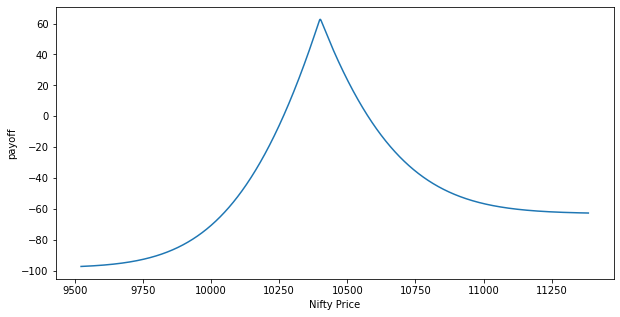

In [13]:
df['payoff'] = df.dec_call_price - df.nov_call_price - setup_cost
plt.figure(figsize=(10,5))
plt.ylabel("payoff")
plt.xlabel("Nifty Price")
plt.plot(sT,df.payoff)
plt.show()